In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils.visualization.latexify as lt

In [5]:
scene_name = 'pred_dv1_121'
scene_path = 'data/' + scene_name + '.csv'

In [6]:
df = pd.read_csv(scene_path, parse_dates=['Timestamp'])

In [7]:
ts = df.loc[:, ['Timestamp', 'start_pred', 'start', '0.0', '1.0', '2.0']]

In [8]:
diff_value = 20000000
if len(np.where(diff_value < np.diff(ts.Timestamp).astype(np.float))[0]):
    diff_idx = np.where(diff_value < np.diff(ts.Timestamp).astype(np.float))[0][0]
    loc_ts = ts.iloc[:diff_idx]
else:
    loc_ts = ts

In [9]:
# set starting point to 
first_moving_idx = loc_ts.loc[ts.loc[:, 'start'] == 1.0].iloc[0].loc['Timestamp']

In [10]:
new_ts = loc_ts
new_ts.Timestamp = ts.Timestamp - first_moving_idx

C:\Users\Maarten\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
first_starting_idx = new_ts.loc[new_ts.loc[:, 'start'] == 0.5].iloc[0].loc['Timestamp']

In [12]:
loc_timestamp = new_ts.Timestamp.values.astype(np.float) / 1000000000.0

In [13]:
lt.latexify()

C:\Users\Maarten\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


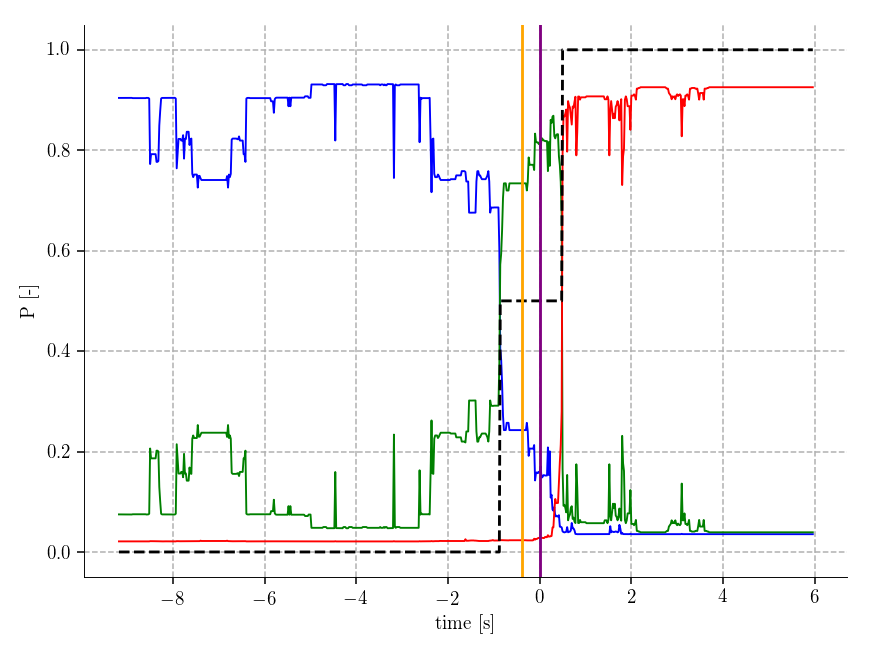

In [14]:
%matplotlib notebook
fig, ax = plt.subplots()
lt.format_axes(ax)
ax.plot(loc_timestamp, new_ts.loc[:, '0.0'], c='b', linewidth=1.0)
ax.plot(loc_timestamp, new_ts.loc[:, '1.0'], c='g', linewidth=1.0)
ax.plot(loc_timestamp, new_ts.loc[:, '2.0'], c='r', linewidth=1.0)
ax.plot(loc_timestamp, new_ts.loc[:, 'start_pred'], c='k', linestyle='--', linewidth=1.5)
ax.axvline(0, color='purple')
ax.axvline(float(first_starting_idx.value) / 1000000000.0, color='orange')
ax.set_xlabel('time [s]')
ax.set_ylabel('P [-]')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig(scene_name + ".pdf")